In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('civicAL.csv') # read the scraped file

In [3]:
df.head(5)

,price,Title,Location,OdoType
0,"$20,499.00",2016 Honda Civic Sedan LX | MANUAL TRANS/BACKU...,Edmonton < 8 hours ago,"Manual | 107,923 km | CARFAX Canada Report"
1,"$26,998.00",2019 Honda Civic Sedan LX | Bluetooth | Backup...,Provincial Top Ad: Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report"
2,"$25,499.00",2020 Honda Civic Sedan EX w/New Wheel Design,Strathcona County Yesterday,"Automatic | 71,030 km | CARFAX Canada Report"
3,"$23,000.00",2020 Honda Civic EX,St. Albert 18/12/2022,"Automatic | 31,000 km"
4,"$22,998.00",2016 Honda Civic EX,Calgary < 5 hours ago,"Automatic | 102,018 km | CARFAX Canada Report"


In [4]:
# make the headings consistent
df.columns=df.columns.str.lower()
df.head(3)

,price,title,location,odotype
0,"$20,499.00",2016 Honda Civic Sedan LX | MANUAL TRANS/BACKU...,Edmonton < 8 hours ago,"Manual | 107,923 km | CARFAX Canada Report"
1,"$26,998.00",2019 Honda Civic Sedan LX | Bluetooth | Backup...,Provincial Top Ad: Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report"
2,"$25,499.00",2020 Honda Civic Sedan EX w/New Wheel Design,Strathcona County Yesterday,"Automatic | 71,030 km | CARFAX Canada Report"


In [5]:
df.shape # many of the rows does not involve actual transaction

(403, 4)

In [6]:
# create another additinal column for vehicle year
df_year_title= df.title.str.split(" ", n=1, expand=True)     # create columns with 0 and 1 as heading
df_year_title.head(3)

,0,1
0,2016,Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM
1,2019,Honda Civic Sedan LX | Bluetooth | Backup Camera
2,2020,Honda Civic Sedan EX w/New Wheel Design


In [7]:

df_year_title= df_year_title.rename(columns={0: 'year', 1: 'title_new'}) # rename the created columns
df_year_title

,year,title_new
0,2016,Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM
1,2019,Honda Civic Sedan LX | Bluetooth | Backup Camera
2,2020,Honda Civic Sedan EX w/New Wheel Design
3,2020,Honda Civic EX
4,2016,Honda Civic EX
...,...,...
398,Wanted:,2017 Honda Civic Type R Wanted
399,2016,"Honda Civic Touring, 4 door"
400,2015,Honda Civic
401,2020,Honda Civic LX


In [8]:
# Join new df_year_title to df
df = pd.concat([df, df_year_title], axis=1)


In [9]:
df.head()

,price,title,location,odotype,year,title_new
0,"$20,499.00",2016 Honda Civic Sedan LX | MANUAL TRANS/BACKU...,Edmonton < 8 hours ago,"Manual | 107,923 km | CARFAX Canada Report",2016,Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM
1,"$26,998.00",2019 Honda Civic Sedan LX | Bluetooth | Backup...,Provincial Top Ad: Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera
2,"$25,499.00",2020 Honda Civic Sedan EX w/New Wheel Design,Strathcona County Yesterday,"Automatic | 71,030 km | CARFAX Canada Report",2020,Honda Civic Sedan EX w/New Wheel Design
3,"$23,000.00",2020 Honda Civic EX,St. Albert 18/12/2022,"Automatic | 31,000 km",2020,Honda Civic EX
4,"$22,998.00",2016 Honda Civic EX,Calgary < 5 hours ago,"Automatic | 102,018 km | CARFAX Canada Report",2016,Honda Civic EX


In [10]:
#drop the title heading
df=df.drop('title', axis=1)
df

,price,location,odotype,year,title_new
0,"$20,499.00",Edmonton < 8 hours ago,"Manual | 107,923 km | CARFAX Canada Report",2016,Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM
1,"$26,998.00",Provincial Top Ad: Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera
2,"$25,499.00",Strathcona County Yesterday,"Automatic | 71,030 km | CARFAX Canada Report",2020,Honda Civic Sedan EX w/New Wheel Design
3,"$23,000.00",St. Albert 18/12/2022,"Automatic | 31,000 km",2020,Honda Civic EX
4,"$22,998.00",Calgary < 5 hours ago,"Automatic | 102,018 km | CARFAX Canada Report",2016,Honda Civic EX
...,...,...,...,...,...
398,"$20,000.00",Edmonton 02/11/2022,"88,000 km",Wanted:,2017 Honda Civic Type R Wanted
399,"$25,000.00",Edmonton 01/11/2022,"59,000 km",2016,"Honda Civic Touring, 4 door"
400,"$16,900.00",Calgary 28/10/2022,"Automatic | 120,220 km",2015,Honda Civic
401,$186.00,Edmonton 26/10/2022,"Automatic | 66,165 km",2020,Honda Civic LX


In [11]:
#Check for null values
df.isnull().sum()

price        0
location     0
odotype      2
year         0
title_new    8
dtype: int64

In [12]:
# No way to knoe the title_new and odotype null values and since they are few entries, we drop the rows 
df=df.dropna()
df.isnull().sum()

price        0
location     0
odotype      0
year         0
title_new    0
dtype: int64

In [13]:
# check if title_new columns contaains '20' that is, a year string
df[df.title_new.str.contains('20')].head()

,price,location,odotype,year,title_new
36,"$26,500.00",Edmonton Yesterday,"Automatic | 20,700 km | CARFAX Canada Report",Honda,Civic 2020 LX
68,"$34,500.00",Edmonton 21/12/2022,"Automatic | 52,000 km",Honda,civic 2022 touring
170,"$18,200.00",Edmonton 14/12/2022,"170,000 km",Honda,civic touring 2016 Active status
191,"$15,400.00",Lloydminster 13/12/2022,Automatic | 206 km,Honda,civic 2016
201,"$18,000.00",Calgary 13/12/2022,"Automatic | 85,000 km",Honda,Civic Touring 2018 Fully Loaded!


In [14]:
df[df.title_new.str.contains('20')].count() # we have 12 rows that the year contains wrong value, we fix that later

price        12
location     12
odotype      12
year         12
title_new    12
dtype: int64

### Reduce the location to the two main city of Edmonton and Calgary. We will create a new column that will contain only the two cities


In [15]:
df.location.value_counts().head(30)

Edmonton 20/12/2022            21
Calgary Yesterday              14
Calgary 15/12/2022             14
Calgary < 5 hours ago          13
Calgary 08/12/2022             12
Calgary 10/12/2022             12
Calgary 13/12/2022             11
Edmonton 07/12/2022             8
Edmonton 16/12/2022             8
Calgary 07/12/2022              7
Edmonton 09/12/2022             7
Edmonton 15/12/2022             7
Calgary < 7 hours ago           6
Calgary 16/12/2022              6
Medicine Hat 20/12/2022         6
Edmonton 13/12/2022             6
Calgary 21/12/2022              6
Edmonton 10/12/2022             5
Location Edmonton               5
Calgary 19/12/2022              5
Calgary 20/12/2022              4
Edmonton 17/12/2022             4
Calgary 22/11/2022              4
Calgary 14/12/2022              4
Grande Prairie Yesterday        4
NEW CAR Edmonton 01/12/2022     4
Calgary 11/12/2022              4
Edmonton Yesterday              4
Calgary 17/12/2022              4
NEW CAR Edmont

In [16]:
# check the number of location that contains edmonton and Calgary
df[df.location.str.contains('Edmonton|Calgary')]

,price,location,odotype,year,title_new
0,"$20,499.00",Edmonton < 8 hours ago,"Manual | 107,923 km | CARFAX Canada Report",2016,Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM
1,"$26,998.00",Provincial Top Ad: Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera
4,"$22,998.00",Calgary < 5 hours ago,"Automatic | 102,018 km | CARFAX Canada Report",2016,Honda Civic EX
5,"$26,998.00",Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera
6,"$31,888.00",Calgary < 30 minutes ago,"Automatic | 19,800 km",2022,Honda Civic EX
...,...,...,...,...,...
398,"$20,000.00",Edmonton 02/11/2022,"88,000 km",Wanted:,2017 Honda Civic Type R Wanted
399,"$25,000.00",Edmonton 01/11/2022,"59,000 km",2016,"Honda Civic Touring, 4 door"
400,"$16,900.00",Calgary 28/10/2022,"Automatic | 120,220 km",2015,Honda Civic
401,$186.00,Edmonton 26/10/2022,"Automatic | 66,165 km",2020,Honda Civic LX


In [17]:
# restrict data to city of Edmonton and Calgary. drop other cities
df =df[df.location.str.contains('Edmonton|Calgary')]

In [18]:
df

,price,location,odotype,year,title_new
0,"$20,499.00",Edmonton < 8 hours ago,"Manual | 107,923 km | CARFAX Canada Report",2016,Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM
1,"$26,998.00",Provincial Top Ad: Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera
4,"$22,998.00",Calgary < 5 hours ago,"Automatic | 102,018 km | CARFAX Canada Report",2016,Honda Civic EX
5,"$26,998.00",Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera
6,"$31,888.00",Calgary < 30 minutes ago,"Automatic | 19,800 km",2022,Honda Civic EX
...,...,...,...,...,...
398,"$20,000.00",Edmonton 02/11/2022,"88,000 km",Wanted:,2017 Honda Civic Type R Wanted
399,"$25,000.00",Edmonton 01/11/2022,"59,000 km",2016,"Honda Civic Touring, 4 door"
400,"$16,900.00",Calgary 28/10/2022,"Automatic | 120,220 km",2015,Honda Civic
401,$186.00,Edmonton 26/10/2022,"Automatic | 66,165 km",2020,Honda Civic LX


In [19]:
#df['num'] = df['col'].str.extract(r'(\d+)')
#we extract edmonton and calgary for and rename as location_new
df.location_new = df.location.str.extract(r'(Edmonton|Calgary)')
df.location_new

C:\Users\ola\AppData\Local\Temp\ipykernel_4432\2194082748.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.location_new = df.location.str.extract(r'(Edmonton|Calgary)')


,0
0,Edmonton
1,Calgary
4,Calgary
5,Calgary
6,Calgary
...,...
398,Edmonton
399,Edmonton
400,Calgary
401,Edmonton


In [20]:
#rename the column and join to original dataframe df
df.location_new.rename(columns={0:'location_new'}, inplace= True)

In [21]:
df.location_new

,location_new
0,Edmonton
1,Calgary
4,Calgary
5,Calgary
6,Calgary
...,...
398,Edmonton
399,Edmonton
400,Calgary
401,Edmonton


In [22]:
df =pd.concat([df, df.location_new], axis=1)
df

,price,location,odotype,year,title_new,location_new
0,"$20,499.00",Edmonton < 8 hours ago,"Manual | 107,923 km | CARFAX Canada Report",2016,Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM,Edmonton
1,"$26,998.00",Provincial Top Ad: Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera,Calgary
4,"$22,998.00",Calgary < 5 hours ago,"Automatic | 102,018 km | CARFAX Canada Report",2016,Honda Civic EX,Calgary
5,"$26,998.00",Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera,Calgary
6,"$31,888.00",Calgary < 30 minutes ago,"Automatic | 19,800 km",2022,Honda Civic EX,Calgary
...,...,...,...,...,...,...
398,"$20,000.00",Edmonton 02/11/2022,"88,000 km",Wanted:,2017 Honda Civic Type R Wanted,Edmonton
399,"$25,000.00",Edmonton 01/11/2022,"59,000 km",2016,"Honda Civic Touring, 4 door",Edmonton
400,"$16,900.00",Calgary 28/10/2022,"Automatic | 120,220 km",2015,Honda Civic,Calgary
401,$186.00,Edmonton 26/10/2022,"Automatic | 66,165 km",2020,Honda Civic LX,Edmonton


### Clean the price column so that it contains only numerical value for price

In [24]:
df.price.value_counts()
# check the cars with "please contact" price and let us see how we can fix that entry

$24,990.00        9
Please Contact    8
$26,990.00        8
$26,888.00        5
$25,990.00        5
                 ..
$28,319.00        1
$37,424.00        1
$17,500.00        1
$24,900.00        1
$186.00           1
Name: price, Length: 208, dtype: int64

In [25]:
df[df.price.str.contains('Please Contact')]

,price,location,odotype,year,title_new,location_new
29,Please Contact,Calgary < 18 hours ago,"Manual | 142,687 km | CARFAX Canada Report",2015,Honda Civic Si,Calgary
55,Please Contact,Calgary Yesterday,"113,410 km",2015,Honda Civic Coupe,Calgary
104,Please Contact,Edmonton 20/12/2022,"Automatic | 33,727 km | CARFAX Canada Report",2018,Honda Civic Sedan EX | SUNROOF/BACKUP CAM,Edmonton
255,Please Contact,Calgary 08/12/2022,"Automatic | 17,948 km",2018,Honda Civic Sedan EX BCAM SROOF BTOOTH,Calgary
379,Please Contact,Edmonton 17/11/2022,"Automatic | 111,969 km | CARFAX Canada Report",2015,Honda CIVIC,Edmonton
394,Please Contact,Calgary 09/11/2022,"Automatic | 29,000 km",Honda,Civic 2020,Calgary
397,Please Contact,Calgary 06/11/2022,"Automatic | 80,000 km",2018,Honda civic turbo touring Rebuild status,Calgary
402,Please Contact,Edmonton 31/12/2000,"Automatic | 180,000 km | CARFAX Canada Report",2017,Honda Civic Sedan EX,Edmonton


In [26]:
# Replace unwantd string from the price column
df['price'] = (df['price'].str.replace('.',''))
df['price'] = (df['price'].str.replace(',',''))
df['price'] = (df['price'].str.replace('$',''))
df


C:\Users\ola\AppData\Local\Temp\ipykernel_4432\3941012214.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = (df['price'].str.replace('.',''))
C:\Users\ola\AppData\Local\Temp\ipykernel_4432\3941012214.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = (df['price'].str.replace('$',''))


,price,location,odotype,year,title_new,location_new
0,2049900,Edmonton < 8 hours ago,"Manual | 107,923 km | CARFAX Canada Report",2016,Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM,Edmonton
1,2699800,Provincial Top Ad: Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera,Calgary
4,2299800,Calgary < 5 hours ago,"Automatic | 102,018 km | CARFAX Canada Report",2016,Honda Civic EX,Calgary
5,2699800,Calgary < 12 minutes ago,"Automatic | 35,765 km | CARFAX Canada Report",2019,Honda Civic Sedan LX | Bluetooth | Backup Camera,Calgary
6,3188800,Calgary < 30 minutes ago,"Automatic | 19,800 km",2022,Honda Civic EX,Calgary
...,...,...,...,...,...,...
398,2000000,Edmonton 02/11/2022,"88,000 km",Wanted:,2017 Honda Civic Type R Wanted,Edmonton
399,2500000,Edmonton 01/11/2022,"59,000 km",2016,"Honda Civic Touring, 4 door",Edmonton
400,1690000,Calgary 28/10/2022,"Automatic | 120,220 km",2015,Honda Civic,Calgary
401,18600,Edmonton 26/10/2022,"Automatic | 66,165 km",2020,Honda Civic LX,Edmonton


In [27]:
df.shape


(327, 6)

In [28]:
# This will convert price to numeric and change any string in the column to NaN
df['price'] = pd.to_numeric(df['price'].str.replace('$',''), errors='coerce')

C:\Users\ola\AppData\Local\Temp\ipykernel_4432\4056812424.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$',''), errors='coerce')


In [29]:
df['price'].isnull().value_counts()

False    275
True      52
Name: price, dtype: int64

In [30]:
#I want to drop the NaN values
df.dropna(subset=['price'], inplace=True)
#pd.to_numeric(df['price'])

In [31]:
df['price'].isnull().value_counts()

False    275
Name: price, dtype: int64

### Clean the Year column, remove unwanted entry

In [32]:
# check unique entry for the column
df.year.value_counts()

2018       53
2017       48
2020       43
2016       41
2019       37
2022       17
2015       14
2021       10
Honda       9
Wanted:     2
Great       1
Name: year, dtype: int64

In [33]:
#Extract only the year enries and create a new_year columns
df['year_new'] = df['year'].str.extract(r'(\d{4})')

In [35]:
# check unique entry for the column
df.year_new.value_counts()

2018    53
2017    48
2020    43
2016    41
2019    37
2022    17
2015    14
2021    10
Name: year_new, dtype: int64

In [36]:
# DROP THE YEAR AND LOCATION COLUMNS
df.drop('year', axis='columns', inplace=True)
df.drop('location', axis='columns',inplace=True)

In [37]:
df


,price,odotype,title_new,location_new,year_new
0,2049900.0,"Manual | 107,923 km | CARFAX Canada Report",Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM,Edmonton,2016
1,2699800.0,"Automatic | 35,765 km | CARFAX Canada Report",Honda Civic Sedan LX | Bluetooth | Backup Camera,Calgary,2019
4,2299800.0,"Automatic | 102,018 km | CARFAX Canada Report",Honda Civic EX,Calgary,2016
5,2699800.0,"Automatic | 35,765 km | CARFAX Canada Report",Honda Civic Sedan LX | Bluetooth | Backup Camera,Calgary,2019
6,3188800.0,"Automatic | 19,800 km",Honda Civic EX,Calgary,2022
...,...,...,...,...,...
396,1800000.0,"Automatic | 100,000 km",Civic sedan,Edmonton,NaN
398,2000000.0,"88,000 km",2017 Honda Civic Type R Wanted,Edmonton,NaN
399,2500000.0,"59,000 km","Honda Civic Touring, 4 door",Edmonton,2016
400,1690000.0,"Automatic | 120,220 km",Honda Civic,Calgary,2015


### Clean the odotype column

In [38]:

#extract only the odo from odotype, Then we create a new column called odo
df['odo'] = df['odotype'].str.extract(r'(\d{2}.*km)')
df

,price,odotype,title_new,location_new,year_new,odo
0,2049900.0,"Manual | 107,923 km | CARFAX Canada Report",Honda Civic Sedan LX | MANUAL TRANS/BACKUP CAM,Edmonton,2016,"107,923 km"
1,2699800.0,"Automatic | 35,765 km | CARFAX Canada Report",Honda Civic Sedan LX | Bluetooth | Backup Camera,Calgary,2019,"35,765 km"
4,2299800.0,"Automatic | 102,018 km | CARFAX Canada Report",Honda Civic EX,Calgary,2016,"102,018 km"
5,2699800.0,"Automatic | 35,765 km | CARFAX Canada Report",Honda Civic Sedan LX | Bluetooth | Backup Camera,Calgary,2019,"35,765 km"
6,3188800.0,"Automatic | 19,800 km",Honda Civic EX,Calgary,2022,"19,800 km"
...,...,...,...,...,...,...
396,1800000.0,"Automatic | 100,000 km",Civic sedan,Edmonton,NaN,"100,000 km"
398,2000000.0,"88,000 km",2017 Honda Civic Type R Wanted,Edmonton,NaN,"88,000 km"
399,2500000.0,"59,000 km","Honda Civic Touring, 4 door",Edmonton,2016,"59,000 km"
400,1690000.0,"Automatic | 120,220 km",Honda Civic,Calgary,2015,"120,220 km"


In [42]:
#extract only thetransmission from odotype, Then we create a new column called transmission
df['transmission'] = df['odotype'].str.extract(r'(\bAutomatic\b|\bManual\b)')

### Create a new dataframe df1 by dropping unnecessary columns for our model

In [43]:
# drop odotype and title_new
df1 = df.drop(['odotype', 'title_new'], axis='columns')

In [44]:
df1


,price,location_new,year_new,odo,transmission
0,2049900.0,Edmonton,2016,"107,923 km",Manual
1,2699800.0,Calgary,2019,"35,765 km",Automatic
4,2299800.0,Calgary,2016,"102,018 km",Automatic
5,2699800.0,Calgary,2019,"35,765 km",Automatic
6,3188800.0,Calgary,2022,"19,800 km",Automatic
...,...,...,...,...,...
396,1800000.0,Edmonton,NaN,"100,000 km",Automatic
398,2000000.0,Edmonton,NaN,"88,000 km",NaN
399,2500000.0,Edmonton,2016,"59,000 km",NaN
400,1690000.0,Calgary,2015,"120,220 km",Automatic


In [46]:
# check unique entries in odo
df1['odo'].unique()

array(['107,923 km', '35,765 km', '102,018 km', '19,800 km', '125,500 km',
       '95,078 km', '64,999 km', '135,519 km', '63,294 km', '69,107 km',
       '163,050 km', '82,000 km', '66,351 km', '22,000 km', '69,850 km',
       '75,000 km', '53,097 km', '125,000 km', '16,200 km', '101,734 km',
       '121,688 km', '118,510 km', '100,000 km', '20,700 km', '41,387 km',
       '27,304 km', '63,481 km', '139,979 km', '84,000 km', '60,838 km',
       '49,239 km', '71,596 km', '31,309 km', '79,681 km', '460 km',
       '33,609 km', '52,000 km', '119,285 km', '34,446 km', '14,918 km',
       '96,675 km', '34,895 km', '69,715 km', '58,263 km', '51,318 km',
       '60,495 km', '46,775 km', '58,699 km', '153,882 km', '61,395 km',
       '114,477 km', '84,178 km', '54,320 km', '26,630 km', '125,715 km',
       '685 km', '28,020 km', '28,831 km', '37,260 km', '985 km',
       '139,650 km', '147,100 km', '114,567 km', '35,215 km', '40,364 km',
       '85,512 km', '76,000 km', '88,300 km', '245,789 

In [48]:
# Remove strings from odo column
df1['odo'] = df1['odo'].str.replace(',','') #remove comma
df1['odo'] = df1['odo'].str.extract(r'(\d*)') # remove kg
df1['odo'] = pd.to_numeric(df1['odo']) #convert to numeric
df1['odo']

0      107923.0
1       35765.0
4      102018.0
5       35765.0
6       19800.0
         ...   
396    100000.0
398     88000.0
399     59000.0
400    120220.0
401     66165.0
Name: odo, Length: 275, dtype: float64

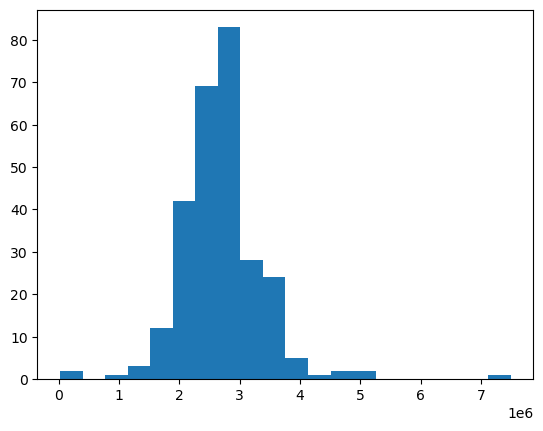

In [49]:
# Visualise target distribution
plt.hist(df1['price'], bins=20)
plt.show() 

### Fix Null values in some columns

In [50]:
# check for null
df1.isnull().sum()

price            0
location_new     0
year_new        12
odo              1
transmission    27
dtype: int64

In [52]:
# Check for the year where odo entry is null
df1[df1.odo.isnull()]

,price,location_new,year_new,odo,transmission
161,3742400.0,Calgary,2022,NaN,Automatic


In [53]:
# odo has just One NaN value
# fill the only NAN with 20000 value because all 2022 model are around that average
df1.odo.fillna(20000, inplace=True)

In [54]:
df1.isnull().sum() # No more null in odo column

price            0
location_new     0
year_new        12
odo              0
transmission    27
dtype: int64

#### Create a function that will fill nulls in the year_new columns

In [55]:
# this function will fill the year column with 2022 if the odo is less than 50000 else it fills it with 2019
# 2022 was chosen because most vehicle will still be new and have low odo as seen from our data


def fill_column_by_condition(df, column_to_fill, condition_column, fill_value, alternate_value):
    for i, row in df.iterrows():
        if pd.isnull(row[column_to_fill]) and row[condition_column] < 50000:
            df.at[i, column_to_fill] = fill_value
        elif pd.isnull(row[column_to_fill]) and row[condition_column] > 50000:
            df.at[i, column_to_fill] = alternate_value
    return df

In [56]:
#call the function to fill the NaN in year_new column and create a new dataframe df2
df2=fill_column_by_condition(df1, 'year_new', 'odo', '2022', '2019') 